<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/notebooks/compare_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
color="#01748F"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 779, done.
remote: Counting objects: 100% (431/431), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 779 (delta 242), reused 331 (delta 167), pack-reused 348
Receiving objects: 100% (779/779), 48.43 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (433/433), done.
Updating files: 100% (93/93), done.


In [3]:
%run /content/forest_height/src/load_data.py
%run /content/forest_height/src/evaluate_model.py

Load data and models

In [4]:
X_train, y_train, X_test, y_test = load_data("all")

In [19]:
import joblib
models_path = "forest_height/models/"
gbr = joblib.load(f"{models_path}boosted_trees.joblib")
dt = joblib.load(f"{models_path}decision_trees.joblib")
rf = joblib.load(f"{models_path}random_forest_compressed.joblib")

Get predictions from every model:

Boosted Trees

In [12]:
y_pred_gbr = gbr.predict(X_test)
mae_gbr, mse_gbr, rmse_gbr, mape_gbr = evaluate_model(y_test, y_pred_gbr)

MAE: 9.280223950467056; MSE: 115.27866317137055; RMSE: 3.0463459997950095; MAPE: 1.704318255605027


Decision Trees

In [13]:
y_pred_dt = dt.predict(X_test)
mae_dt, mse_dt, rmse_dt, mape_dt = evaluate_model(y_test, y_pred_dt)

MAE: 9.092768002257936; MSE: 113.95388274455402; RMSE: 3.0154216955938247; MAPE: 1.6514530097337512


Random Forest

In [20]:
y_pred_rf = rf.predict(X_test)
mae_rf, mse_rf, rmse_rf, mape_rf = evaluate_model(y_test, y_pred_rf)

MAE: 8.398340259021765; MSE: 102.9832649683817; RMSE: 2.8979890025708803; MAPE: 1.5442111095984843


### Compare Errors

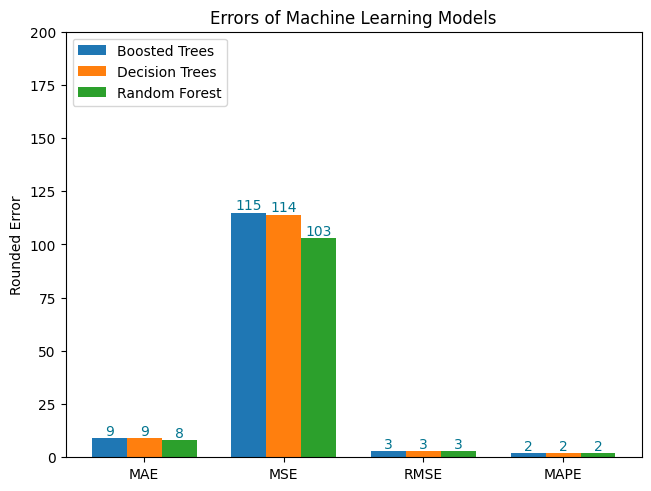

In [21]:
import numpy as np
errors = ("MAE", "MSE", "RMSE", "MAPE")
models = {
    'Boosted Trees': (mae_gbr, mse_gbr, rmse_gbr, mape_gbr),
    'Decision Trees': (mae_dt, mse_dt, rmse_dt, mape_dt),
    'Random Forest': (mae_rf, mse_rf, rmse_rf, mape_rf),
}

x = np.arange(len(errors))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0, color=color)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rounded Error')
ax.set_title('Errors of Machine Learning Models')
ax.set_xticks(x + width, errors)
ax.legend(loc='upper left')
ax.set_ylim(0, 200)

plt.show()

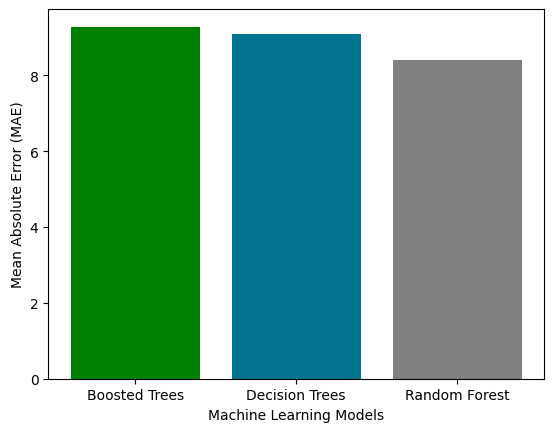

In [33]:
models = ['Boosted Trees', 'Decision Trees', 'Random Forest']
errors = [mae_gbr, mae_dt, mae_rf]
plt.bar(models, errors, color=['green', color, 'gray'])
plt.ylabel("Mean Absolute Error (MAE)")
plt.xlabel("Machine Learning Models")
ax.set_title('MAE of Machine Learning Models')
plt.show()

Predictions vs True Values

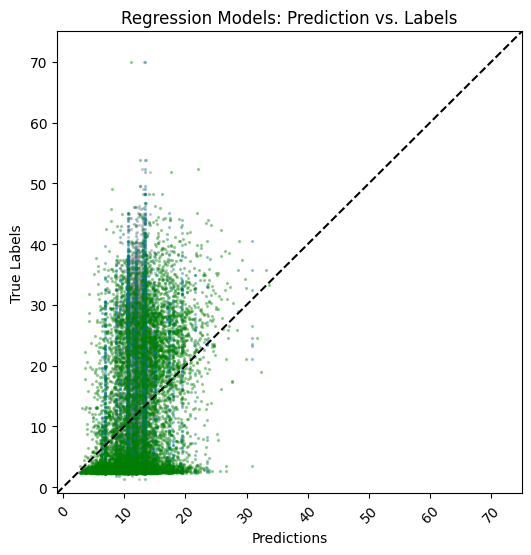

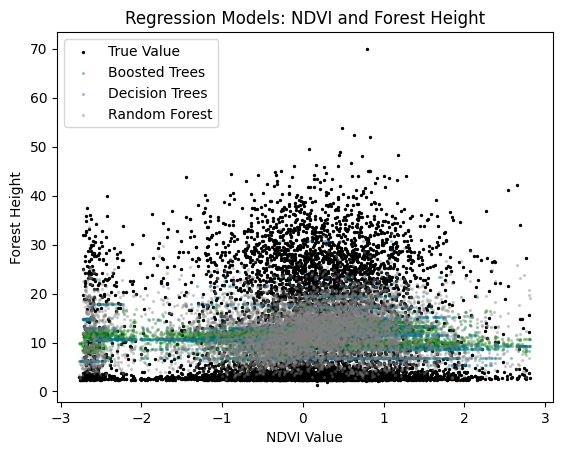

In [27]:
from matplotlib import pyplot as plt
# visualize predictions vs. true labels
fig = plt.figure(figsize=(6,6))
dot_size = 2
alpha = 0.3
plt.scatter(y_pred_gbr, y_test, dot_size, color='gray', alpha=alpha)
plt.scatter(y_pred_dt, y_test, dot_size, color=color, alpha=alpha)
plt.scatter(y_pred_rf, y_test, dot_size, color='green', alpha=alpha)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.plot([-1,75], [-1, 75], 'k--')
plt.xlabel("Predictions")
plt.ylabel("True Labels")
plt.xlim([-1,75])
plt.ylim([-1,75])
ax.legend(("Boosted Trees", "Decision Trees", "Random Forest"), loc='upper left')
plt.title(f"Regression Models: Prediction vs. Labels")
plt.show()

# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
channel = 10 if X_test.shape[1] > 9 else 0
fig, ax = plt.subplots()
NDVI = X_test[:,10]
plt.scatter(NDVI, y_test, dot_size, color='black')
plt.scatter(NDVI, y_pred_gbr, dot_size, color='green', alpha=alpha)
plt.scatter(NDVI, y_pred_dt, dot_size, color=color, alpha=alpha)
plt.scatter(NDVI, y_pred_rf, dot_size, color='gray', alpha=alpha)
plt.title(f'Regression Models: NDVI and Forest Height')
if channel == 10:
    plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Boosted Trees", "Decision Trees", "Random Forest"), loc='upper left')
plt.show()

### Compare Feature Importance

In [ ]:
import numpy as np
channel = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI']
models = {
    'Boosted Trees': gbr.feature_importances_ * 100,
    'Decision Trees': dt.feature_importances_ * 100,
    'Random Forest': rf.feature_importances_ * 100,
}

x = np.arange(len(channel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature Importance (rounded in %)')
ax.set_title('Feature Importance for Each Model')
ax.set_xticks(x + width, channel)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)

plt.show()

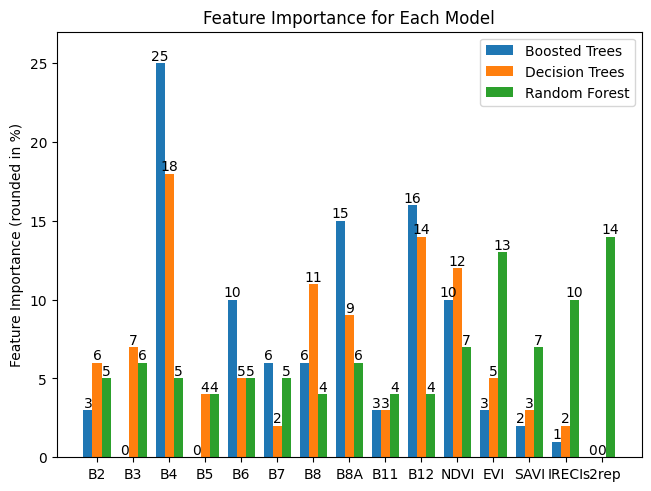

In [31]:
import numpy as np
channel = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12', 'NDVI', 'EVI', 'SAVI', 'IRECI', 's2rep']
models = {
    'Boosted Trees': gbr.feature_importances_ * 100,
    'Decision Trees': dt.feature_importances_ * 100,
    'Random Forest': rf.feature_importances_ * 100,
}

x = np.arange(len(channel))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in models.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, np.round(measurement), width, label=attribute)
    ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Feature Importance (rounded in %)')
ax.set_title('Feature Importance for Each Model')
ax.set_xticks(x + width, channel)
ax.legend(loc='upper right')
ax.set_ylim(0, 27)

plt.show()